In [1]:
#  Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
%matplotlib inline
import seaborn as sns
sns.set()

## Title
Boston Housing Price Prediction: EDA-Driven Linear Regression and Its Limitations   
## Objectives
The goal of this project is to predict median house prices using the Boston Housing dataset.
The project focuses on understanding the data through Exploratory Data Analysis (EDA)
and applying a baseline Linear Regression model while discussing its limitations.

In [2]:
# Loading dataset
df=pd.read_csv('BostonHousing.csv')

## Dataset Overview

The Boston Housing dataset contains information about housing in different areas of Boston.
It includes features such as crime rate, number of rooms, and lower status population percentage.
The target variable is MEDV, which represents the median house price.

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Naming columns

In [6]:

column=['Crime Rate','Residential Proportion','non-retail business acres/Town','Charles River','NO2 concentration',
        'Average Rooms/Dwelling','Prior Built Units Proportion', ' Distance to Employeent Centres','Radial Highways'
        ' Distance','ValueProperty/tax rate','Teacher/town','blacks/town','lower Status Percent','Median home price']
columns=column[:-1]
target='Median home price'

In [7]:
df.columns=column

In [8]:
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling,Prior Built Units Proportion,Distance to Employeent Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,lower Status Percent,Median home price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 14)

In [10]:
# Checking Null values
df.isnull().sum()

Crime Rate                         0
Residential Proportion             0
non-retail business acres/Town     0
Charles River                      0
NO2 concentration                  0
Average Rooms/Dwelling             5
Prior Built Units Proportion       0
 Distance to Employeent Centres    0
Radial Highways Distance           0
ValueProperty/tax rate             0
Teacher/town                       0
blacks/town                        0
lower Status Percent               0
Median home price                  0
dtype: int64

In [ ]:
# Filling Null values
df.isnull().sum()
df['Average Rooms/Dwelling'].fillna(
    df['Average Rooms/Dwelling'].mean(),
    inplace=True)

In [12]:
df['Average Rooms/Dwelling'].isnull().sum()

np.int64(0)

## Exploratory Data Analysis

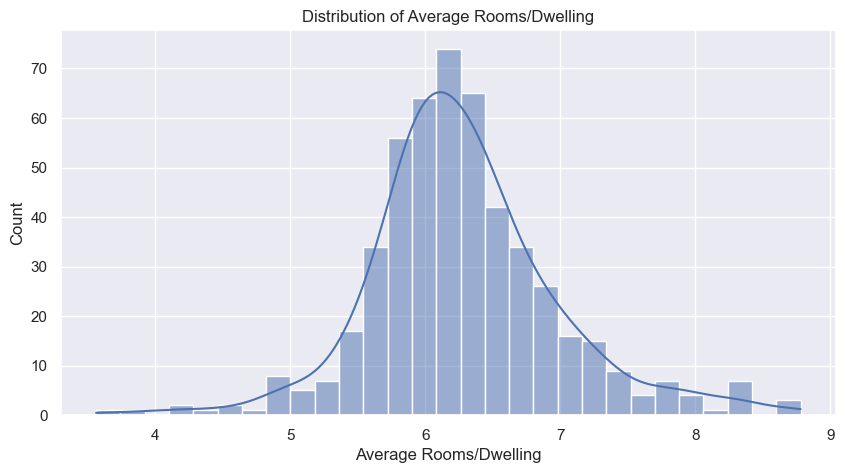

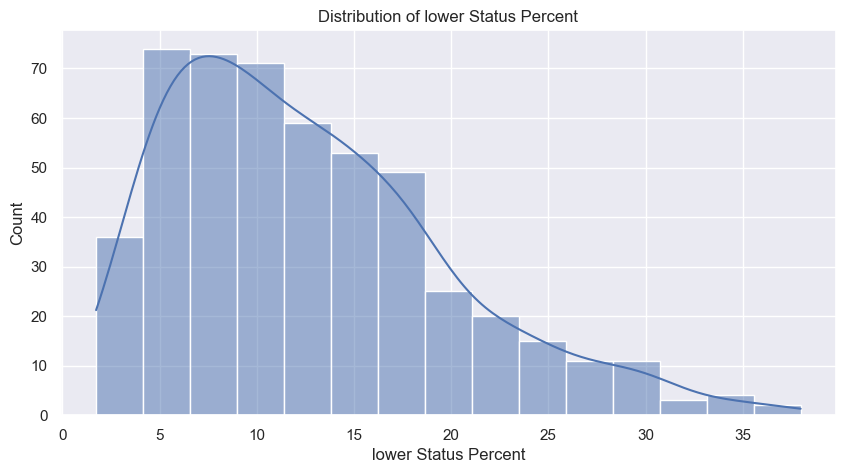

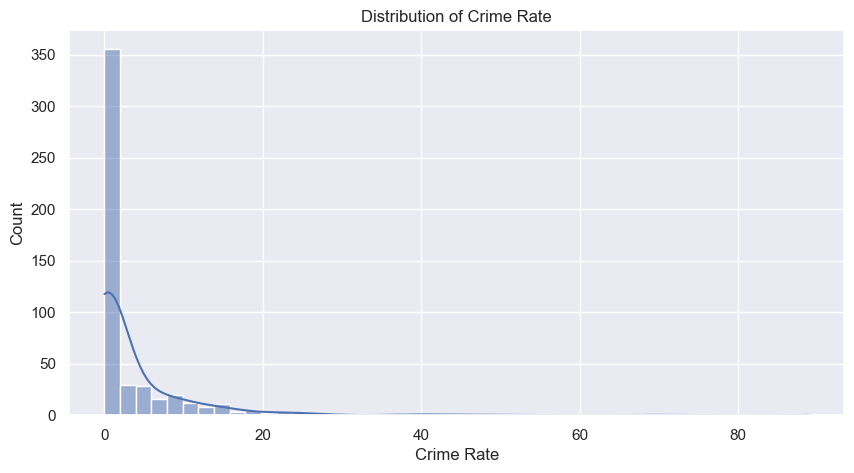

In [13]:
# plt.Figure(figsize=(15,6))
features=['Average Rooms/Dwelling','lower Status Percent','Crime Rate']

for i in features:
   plt.figure(figsize=(10,5))
   sns.histplot(data=df[i],kde=True)
   plt.title(f'Distribution of {i}')

   plt.show()

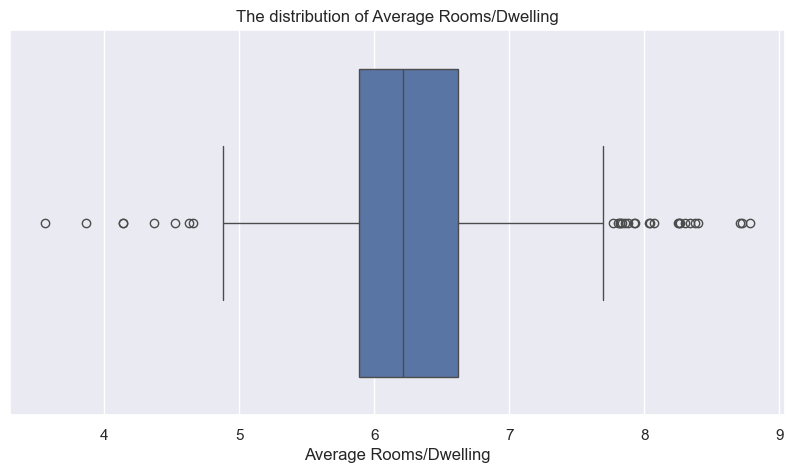

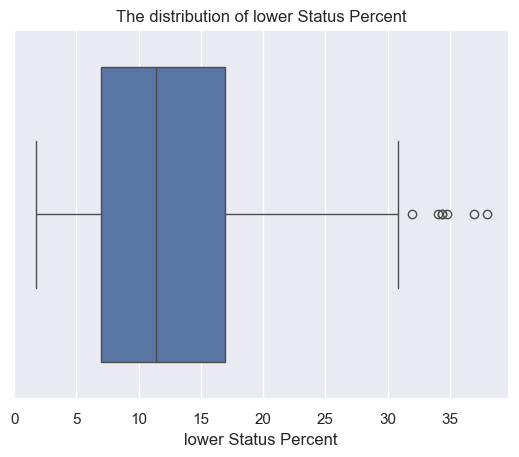

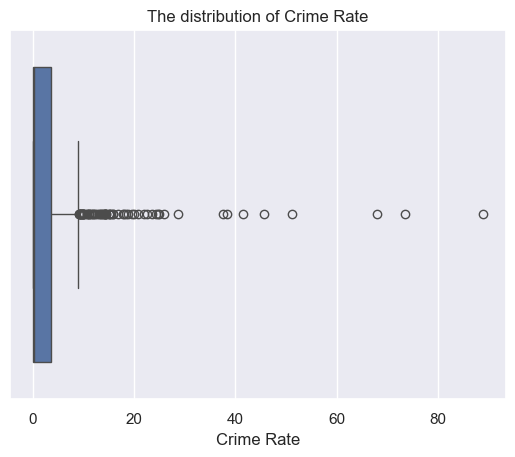

In [14]:
plt.figure(figsize=(10,5))
cols=['Average Rooms/Dwelling','lower Status Percent','Crime Rate']
for col in cols:
   sns.boxplot(x=df[col])
   plt.title(f'The distribution of {col}')
   plt.show()

### Feature Distribution Observations

- Average Rooms Dwelling shows a roughly symmetric distribution, indicating a balanced spread of room counts.
- Lower Status Percent is right-skewed, suggesting that most areas have a lower percentage of lower-status population.
- Crime Rate is heavily right-skewed, with most values near zero and a few extreme outliers.

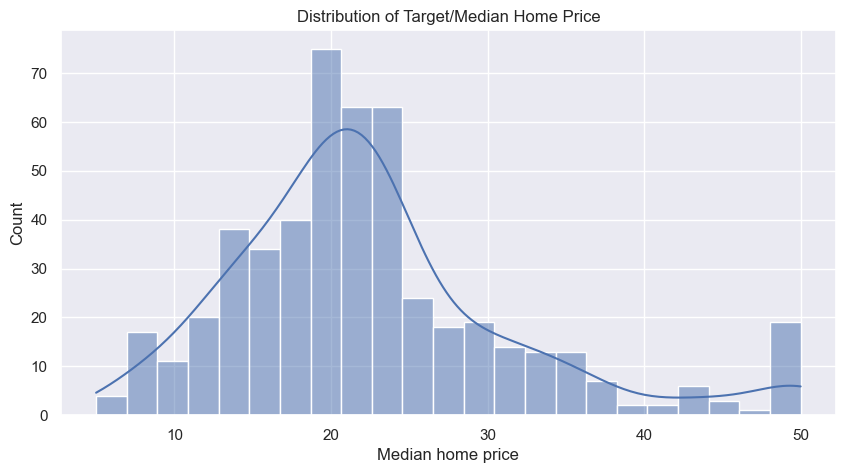

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data=df[target],kde=True)
plt.title('Distribution of Target/Median Home Price')
plt.show()

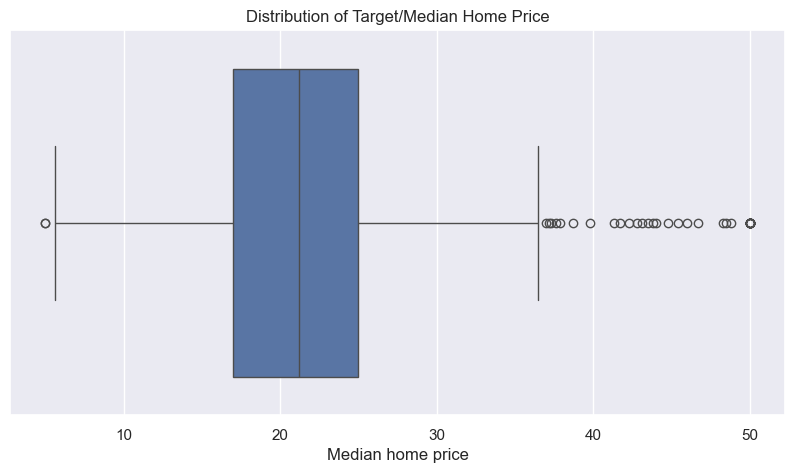

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df[target])
plt.title('Distribution of Target/Median Home Price')
plt.show()

## Target Variable Analysis

The target variable (MEDV) ranges from 5 to 50.
An artificial upper cap at 50 is observed, indicating truncation in the dataset.
This limits the model’s ability to learn price variations for high-priced houses.

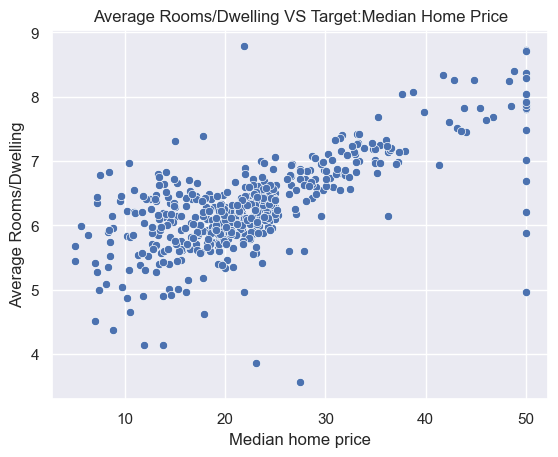

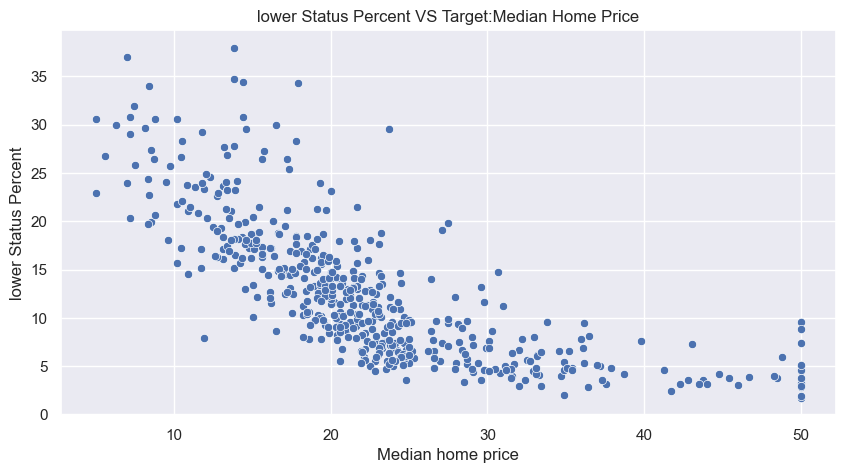

<Figure size 1000x500 with 0 Axes>

In [17]:
sns.scatterplot(x=df[target],
                y=df['Average Rooms/Dwelling'])
plt.title('Average Rooms/Dwelling VS Target:Median Home Price')
plt.figure(figsize=(10,5))

sns.scatterplot(x=df[target],
                y=df['lower Status Percent'])
plt.title('lower Status Percent VS Target:Median Home Price')
plt.figure(figsize=(10,5))
plt.show()


### Checking Correlation Between columns

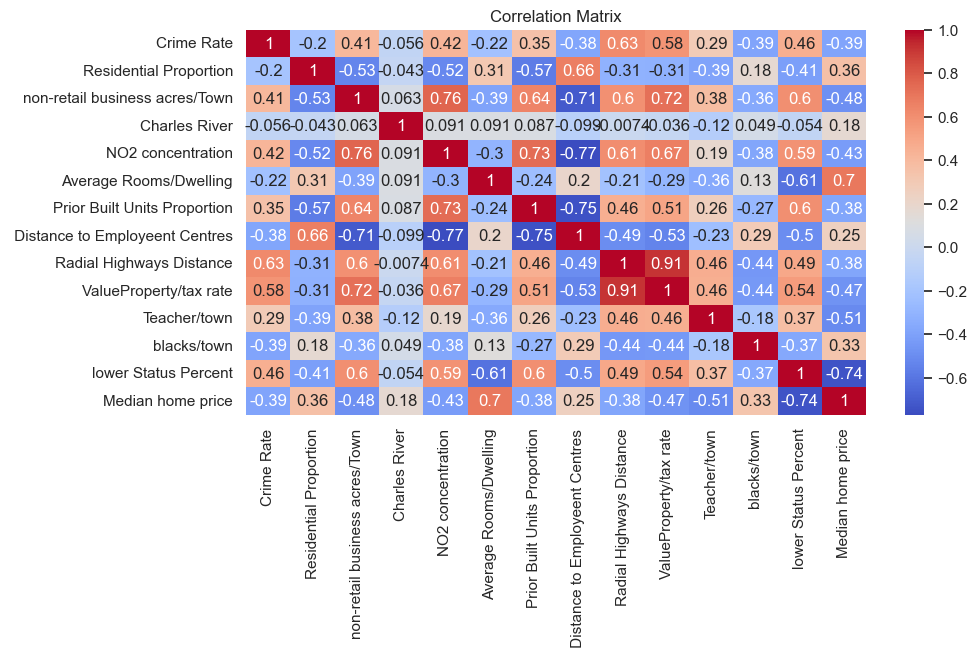

In [18]:
# Correlation of all features + target
df_all = df.copy()

corr = df_all.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### Correlation Insights

```Average Rooms Dwelling``` shows a positive correlation with ```Median Home Price```, while ```Lower Status Percent``` has a strong negative correlation.
This suggests that houses with more rooms tend to have higher prices,
whereas higher lower-status population percentages are associated with lower prices.

In [19]:
X=df.drop(['Median home price'],axis=1)
Y=df[target]

In [20]:
print(Y.shape)
print(X.shape)

(506,)
(506, 13)


## Normalization

In [21]:
# Min Max Scalar
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
x_scaled_minmax=min_max_scaler.fit_transform(X)
X=pd.DataFrame(x_scaled_minmax , columns=columns)
X.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling,Prior Built Units Proportion,Distance to Employeent Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


#### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.30,random_state=25,shuffle=True)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(354, 13) (354,)
(152, 13) (152,)


### EDA Summary
Based on EDA, Average Rooms Dwelling and Lower status percentage show strong influence on house prices,
while multicollinearity is observed between Radial Highway distance and TAX.

## Baseline Linear Regression Model  
### Why Linear Regression
“Linear Regression was chosen because it is simple, interpretable, and helps establish a baseline model before moving to more complex techniques.”

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

### Modeling And Training Data


In [24]:
model.fit(xtrain,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Predicting Values from Model

In [25]:
pred=model.predict(xtest)
pred2=model.predict(xtrain)

In [26]:
model.coef_

array([-10.25213823,   5.05599427,   0.76774744,   0.73285455,
        -9.23052789,  20.98838387,  -0.45286324, -16.99837522,
         8.46029618,  -8.73154927,  -9.29617848,   2.95139505,
       -16.64980758])

In [27]:
model.intercept_

np.float64(27.4480956411845)

### Checking r2 by sklearn metric
r2 is a statistic that will give some information about the goodness of fit of a model. In linear regression , the R2 coefficeint of determination is a statistical measure of how well the regression predictions approximate the real data points

In [28]:
from sklearn.metrics import r2_score
test_r2=r2_score(ytest,pred)

In [29]:
train_r2=r2_score(ytrain,pred2)

In [30]:
print('R2 score for testing : ',test_r2)
print('R2 score for Training : ', train_r2)

R2 score for testing :  0.7120610333156985
R2 score for Training :  0.7431646527497848


In [31]:
def adjusted_r2(n,p,test_r2):
    return 1-(1-test_r2)*(n-1)/(n-p-1)
n=xtest.shape[0]
p=xtest.shape[1]
print('The adjusted r2 score of x test:',adjusted_r2(n,p,test_r2))


The adjusted r2 score of x test: 0.6849363480483368


In [32]:
def adjusted_r2(n,p,train_r2):
    return 1-(1-train_r2)*(n-1)/(n-p-1)
n=xtrain.shape[0]
p=xtrain.shape[1]
print('The adjusted r2 score of x train:',adjusted_r2(n,p,train_r2))


The adjusted r2 score of x train: 0.7333444777078648


In [33]:
#  Checking R2 score for every column
r_2=[]
for i in range(1,xtest.shape[-1]+1):
    m=LinearRegression()
    m.fit(xtrain.values[:,:i],ytrain)
    prd=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest,prd))

In [34]:
r_2

[0.13035474849491968,
 0.17083635416893195,
 0.21811763170326548,
 0.3011295387421311,
 0.3052421261157692,
 0.5291156796884499,
 0.5332530042728238,
 0.559458729147098,
 0.5597355438252225,
 0.5635682169937517,
 0.5874358425953395,
 0.6190833994806817,
 0.7120610333156985]

Text(0, 0.5, 'r_2 score')

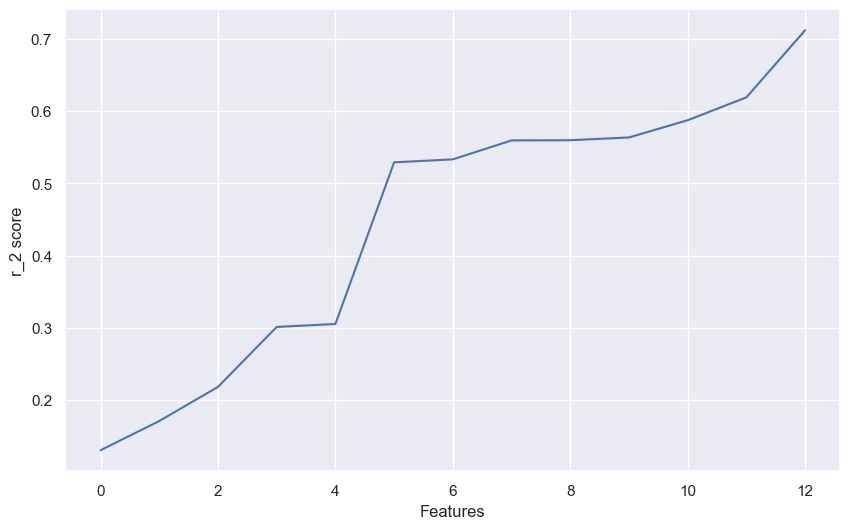

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(data=r_2)
plt.xlabel('Features')
plt.ylabel('r_2 score')

#### Creating Residual Plot

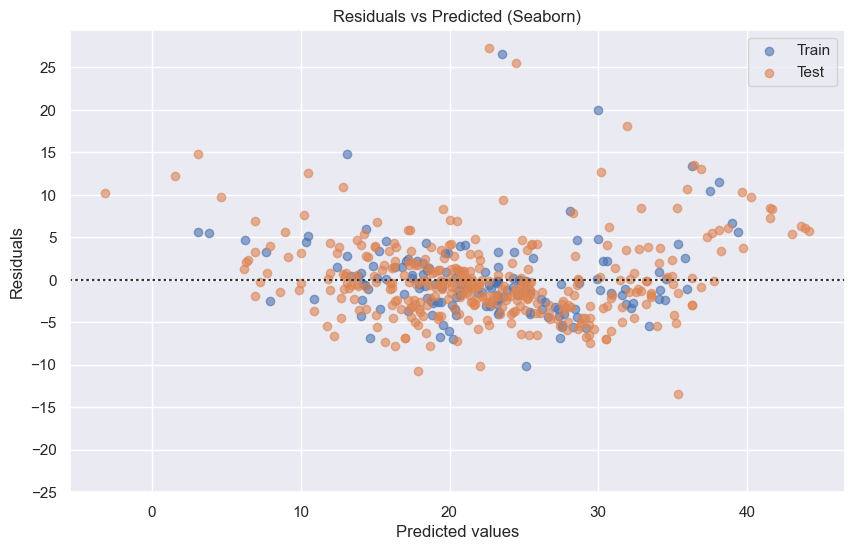

In [36]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.residplot(x=pred,
               y=ytest.values,
                lowess=False,
                scatter_kws={'alpha':0.6},
                label='Train')
sns.residplot(x=pred2,
             y=ytrain.values,
             scatter_kws={'alpha':0.6},
             label='Test')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Seaborn)")
plt.yticks(np.arange(-25, 30, 5))
# plt.xticks(np.arange(0,10,15,20,25,30,35,40))
plt.legend()
plt.show()


#### Recursive Feature Elimination

In [37]:
from sklearn.feature_selection import RFE
lrm=LinearRegression()

In [38]:
# recursive feature elimination with cross validation,using r- squared as metric
rfe=RFE( estimator=lrm , step=3 , n_features_to_select=None)
rfe.fit(X , Y.values)

,"estimator estimator: ``Estimator`` instanceA supervised learning estimator with a ``fit`` method that providesinformation about feature importance(e.g. `coef_`, `feature_importances_`).",LinearRegression()
,"n_features_to_select n_features_to_select: int or float, default=NoneThe number of features to select. If `None`, half of the features areselected. If integer, the parameter is the absolute number of featuresto select. If float between 0 and 1, it is the fraction of features toselect... versionchanged:: 0.24 Added float values for fractions.",None
,"step step: int or float, default=1If greater than or equal to 1, then ``step`` corresponds to the(integer) number of features to remove at each iteration.If within (0.0, 1.0), then ``step`` corresponds to the percentage(rounded down) of features to remove at each iteration.",3
,"verbose verbose: int, default=0Controls verbosity of output.",0
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a `coef_`or `feature_importances_` attributes of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case ofclass:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
rfe.ranking_

array([1, 3, 4, 4, 1, 1, 4, 1, 2, 3, 1, 3, 1])

In [40]:
X.columns

Index(['Crime Rate', 'Residential Proportion',
       'non-retail business acres/Town', 'Charles River', 'NO2 concentration',
       'Average Rooms/Dwelling', 'Prior Built Units Proportion',
       ' Distance to Employeent Centres', 'Radial Highways Distance',
       'ValueProperty/tax rate', 'Teacher/town', 'blacks/town',
       'lower Status Percent'],
      dtype='object')

In [41]:
rfe.support_

array([ True, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True])

In [42]:
feature_name=np.array(columns)

In [43]:
list(feature_name[rfe.support_])

[np.str_('Crime Rate'),
 np.str_('NO2 concentration'),
 np.str_('Average Rooms/Dwelling'),
 np.str_(' Distance to Employeent Centres'),
 np.str_('Teacher/town'),
 np.str_('lower Status Percent')]

In [44]:
# print the optimal number of feature
print('Optimal number of features :%d' % rfe.n_features_)
feature_col_selected=list((feature_name)[rfe.support_])
print('Feature selected : '+ str(feature_col_selected))

Optimal number of features :6
Feature selected : [np.str_('Crime Rate'), np.str_('NO2 concentration'), np.str_('Average Rooms/Dwelling'), np.str_(' Distance to Employeent Centres'), np.str_('Teacher/town'), np.str_('lower Status Percent')]


In [45]:
xtrain_new=xtrain[list(feature_name[rfe.support_])]
xtest_new=xtest[list(feature_name[rfe.support_])]


In [46]:
print(xtrain_new.shape)
print(xtest_new.shape)

(354, 6)
(152, 6)


#### RFE for x train

In [47]:
lm2=LinearRegression()
lm2.fit(xtrain_new,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [48]:
pred_new=lm2.predict(xtest_new)
pred_xtrain=lm2.predict(xtrain_new)

In [49]:
# printing r2 score
print('The R-squared(r2) value is {0:0.4f}: \n'.format( r2_score(ytest,pred_new)))
# printing r2 score
print('The R-squared(r2) value is {0:0.4f}: \n'.format( r2_score(ytrain,pred_xtrain)))



The R-squared(r2) value is 0.6785: 

The R-squared(r2) value is 0.7191: 



### Adjusted R2

In [50]:
print('The adjusted r2 score of x test new is :',adjusted_r2(n,p,r2_score(ytest,pred_new)))
print('The adjusted r2 score of x test new is :',adjusted_r2(n,p,r2_score(ytrain,pred_xtrain)))

The adjusted r2 score of x test new is : 0.6661616565078627
The adjusted r2 score of x test new is : 0.7083890898484992


### Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
scores=cross_val_score(lm2 , xtrain_new , ytrain , cv=5)
scores2=cross_val_score(lm2 , xtest_new , ytest , cv=5)

In [53]:
print('The score for x train new is :',scores)
print('The score for x test new is :',scores2)

The score for x train new is : [0.76934431 0.73020982 0.54693987 0.59885865 0.73903991]
The score for x test new is : [0.60210782 0.45809423 0.61987955 0.71973204 0.79498122]


In [54]:
print('The average score for x train new is :',scores.mean())
print('The average score for x test new is : ',scores2.mean())

The average score for x train new is : 0.6768785122311602
The average score for x test new is :  0.6389589702509759


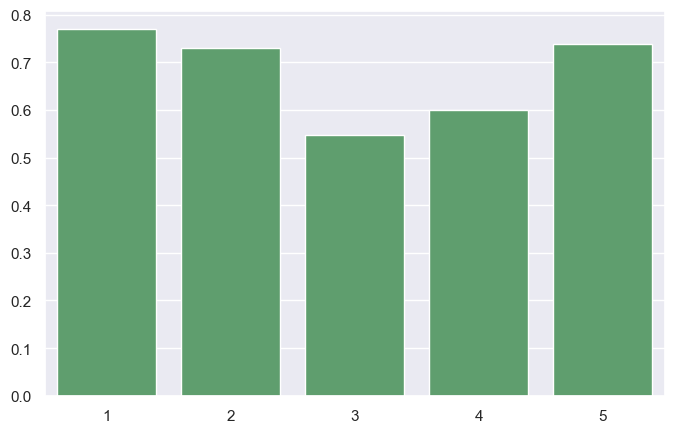

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(scores)+1)),y=scores,color='g')
plt.show()

## Limitations
- The Boston dataset is small and outdated.
- Linear Regression struggles with non-linear relationships.
- Outliers may still influence model performance.

## Final Conclusion
This project demonstrates how EDA directly informs feature selection,
normalization, and model choice in linear regression.